# GUC Clustering Project 

In [ ]:
#Name: Ahmed Alaa
#ID: 43-8545

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 
try: 
    import plotnine
except ImportError:
    print('Installing plotnine ...')
    !pip install --quiet plotnine
    print('Installed plotnine')

Running this project require the following imports 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



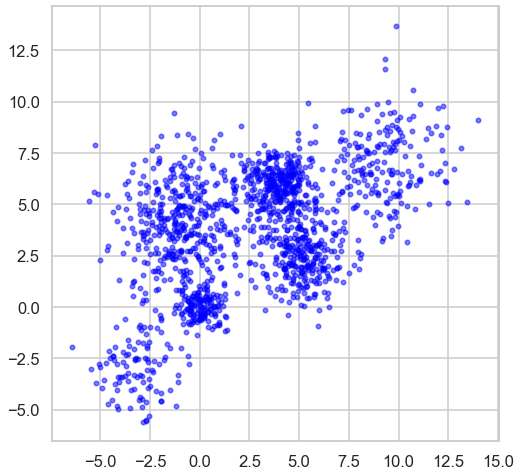

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the appropriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

#### Plotting Different K values for the K-Means Clustering Algorithm
Clustering Results of each K value are stored in the `kmeans_clusters` list.

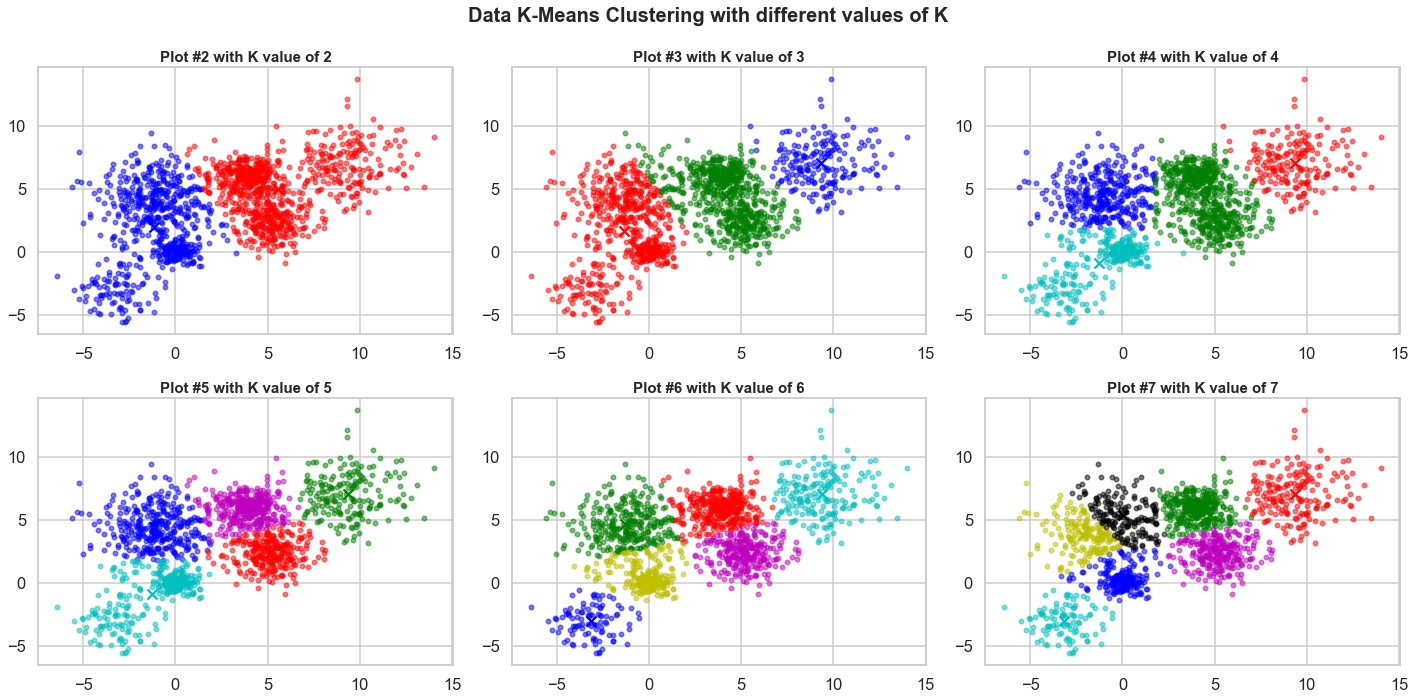

In [ ]:
fig, _ = plt.subplots(nrows = 2, ncols = 3, figsize=(20, 10))
fig.suptitle('Data K-Means Clustering with different values of K', fontsize = 20, fontweight = 'bold')
kmeans_clusters = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Multi_blob_Data)
    kmeans_clusters.append(kmeans)
    plt.subplot(2, 3, k - 1)
    plt.title(f'Plot #{k} with K value of {k}', fontsize = 15, fontweight='bold', loc='center')
    display_cluster(Multi_blob_Data, kmeans,num_clusters=k)
plt.tight_layout()
plt.show()

#### Calculating the Distortion function of each cluster
Sum of the square distances of each cluster members

In [ ]:
wscc = [model.inertia_ for model in kmeans_clusters[0: ]]

##### Plotting the Distortion function vs K values, & choosing the optimal K value

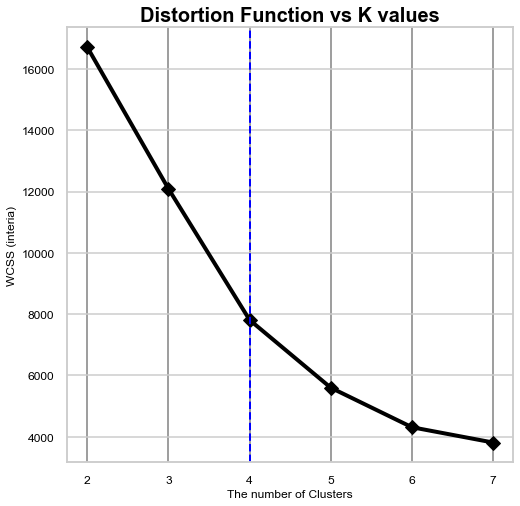

In [ ]:
plt.plot(range(2, 8), wscc, linewidth = 4, color = 'black', marker = 'D', markersize = 10)
plt.title('Distortion Function vs K values', family = 'Arial', fontsize = 20, weight = 'bold', color = 'black')
plt.xlabel('The number of Clusters', family = 'Arial', fontsize = 12, color = 'black')
plt.ylabel('WCSS (interia)', family = 'Arial', fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.grid(which = 'both', color = 'black', axis = 'x', alpha = 0.5)

# Define the number of clusters after checking the elbow!
number_of_clusters = 4

plt.axvline(x = number_of_clusters, linewidth = 2, color = 'blue', linestyle = '--')
plt.show()

#### Calculating the Silhouette Scores of each cluster

In [ ]:
silhouette_scores = [silhouette_score(Multi_blob_Data, cluster.labels_) for cluster in kmeans_clusters[0: ]]

##### Plotting the Silhouette Scores vs K values, & choosing the optimal K value

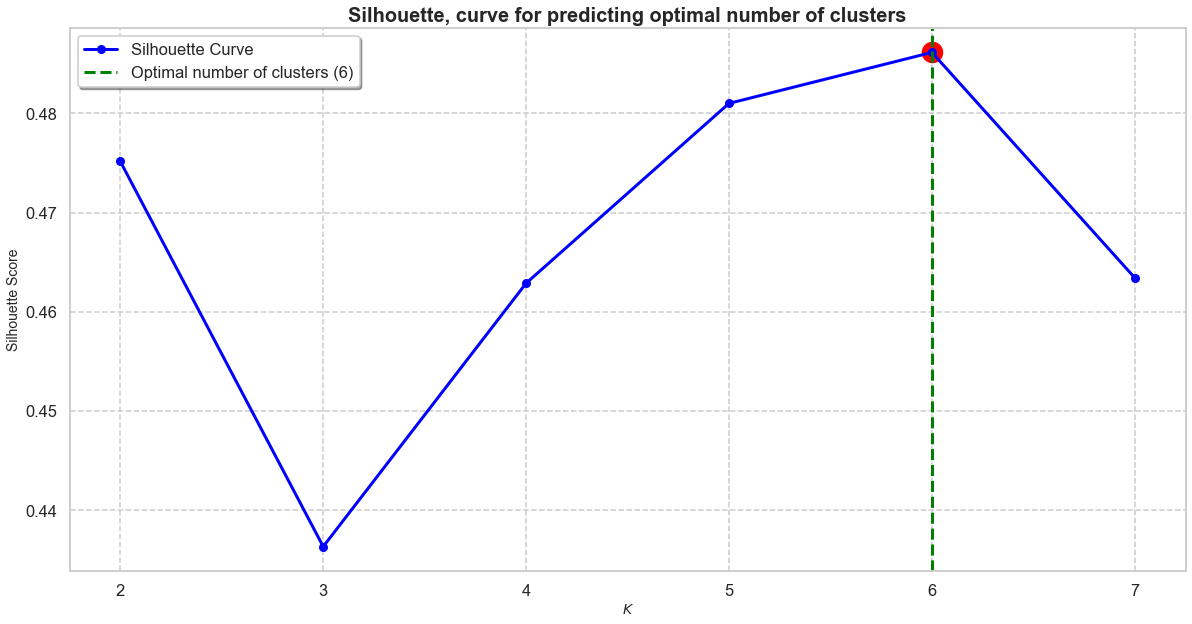

In [ ]:
# Plot the silhouette scores graph
plt.figure(figsize=(20, 10))
plt.plot(range(2, 8), silhouette_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('$K$', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal number of clusters', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 2

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal number of clusters ({k})')
plt.scatter(k, silhouette_scores[k - 2], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

In [ ]:
optimal_silhouette_kmeans_score = (silhouette_scores[k - 2], k)
print(f'the optimal number of clusters for the Multi_blob_Data is: {k}')

the optimal number of clusters for the Multi_blob_Data is: 6


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#### Clustering the data hierarchically according to different parameters

In [ ]:
heirarchal_clusters = {}
heirarchal_clusters['euclidean_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average').fit(Multi_blob_Data)
heirarchal_clusters['euclidean_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'single' ).fit(Multi_blob_Data)
heirarchal_clusters['manhattan_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'average').fit(Multi_blob_Data)
heirarchal_clusters['manhattan_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'single' ).fit(Multi_blob_Data)
heirarchal_clusters['cosine_average']    = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'average').fit(Multi_blob_Data)
heirarchal_clusters['cosine_single']     = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'single' ).fit(Multi_blob_Data)


##### PLotting the Dendogram of each cluster

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
silhouette_hierarchical_scores = {}
silhouette_hierarchical_scores['euclidean_average'] = silhouette_score(Multi_blob_Data, heirarchal_clusters['euclidean_average'].labels_)
silhouette_hierarchical_scores['euclidean_single']  = silhouette_score(Multi_blob_Data, heirarchal_clusters['euclidean_single'].labels_)
silhouette_hierarchical_scores['manhattan_average'] = silhouette_score(Multi_blob_Data, heirarchal_clusters['manhattan_average'].labels_)
silhouette_hierarchical_scores['manhattan_single']  = silhouette_score(Multi_blob_Data, heirarchal_clusters['manhattan_single'].labels_)
silhouette_hierarchical_scores['cosine_average']    = silhouette_score(Multi_blob_Data, heirarchal_clusters['cosine_average'].labels_)
silhouette_hierarchical_scores['cosine_single']     = silhouette_score(Multi_blob_Data, heirarchal_clusters['cosine_single'].labels_)

In [ ]:
silhouette_hierarchical_scores['euclidean_average']

0.41478815574933364

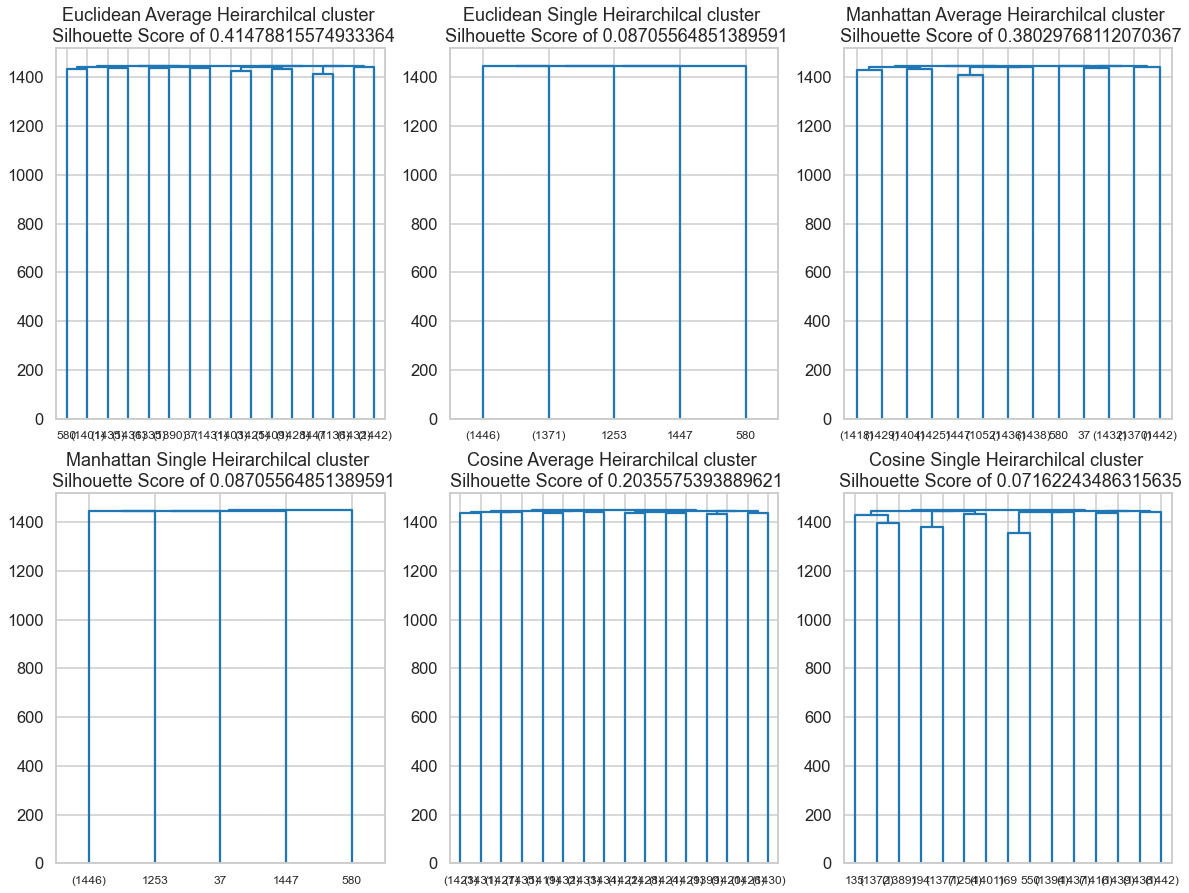

In [ ]:
plt.subplots(nrows = 2, ncols = 3, figsize = (20, 15))

plt.subplot(2, 3, 1)
plt.title(f"Euclidean Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_average']}")
plot_dendrogram(heirarchal_clusters['euclidean_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 2)
plt.title(f"Euclidean Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_single']}")
plot_dendrogram(heirarchal_clusters['euclidean_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 3)
plt.title(f"Manhattan Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_average']}")
plot_dendrogram(heirarchal_clusters['manhattan_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 4)
plt.title(f"Manhattan Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_single']}")
plot_dendrogram(heirarchal_clusters['manhattan_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 5)
plt.title(f"Cosine Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_average']}")
plot_dendrogram(heirarchal_clusters['cosine_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 6)
plt.title(f"Cosine Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_single']}")
plot_dendrogram(heirarchal_clusters['cosine_single'], truncate_mode = 'level', p = 3)

plt.show()

Best set of parameters is the Euclidean Average

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

#### Training the Models

In [ ]:
dbscans = []
for i in range(1, 21):
    model = DBSCAN(eps = i * 0.15, min_samples = 4 + i).fit(Multi_blob_Data)
    dbscans.append(model)

##### Calculating the Silhouette Score of the trained models

In [ ]:
silhouette_dbscans_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(Multi_blob_Data, model.labels_) for model in dbscans[0: ]]

##### Plotting the Silhouette Score vs each DBSCAN Model
ultimate conditions are stored in `best_dbs`

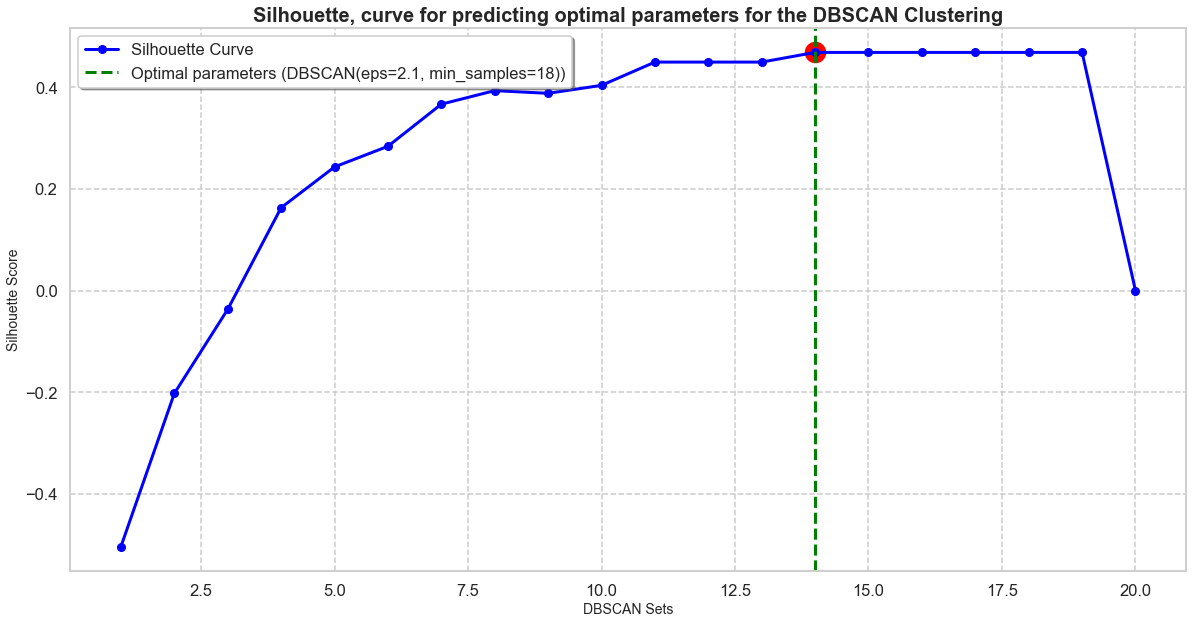

In [ ]:
# Plot the silhouette scores graph
plt.figure(figsize=(20, 10))
plt.plot(range(1, 21), silhouette_dbscans_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('DBSCAN Sets', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal parameters for the DBSCAN Clustering', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
best_dbs = np.argmax(silhouette_dbscans_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = best_dbs, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal parameters ({dbscans[best_dbs - 1]})')
plt.scatter(best_dbs, silhouette_dbscans_scores[best_dbs - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Plotting the best Cluster

Number of clusters is: 5


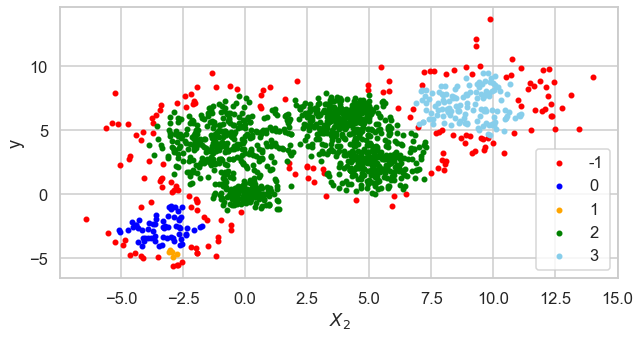

In [ ]:
best_dbs_clusters = dbscans[3].labels_
print(f'Number of clusters is: {len(set(best_dbs_clusters))}')

def show_dbs_clusters(X, cluster): 
    df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=cluster))
    colors = {-1: 'red', 0: 'blue', 1: 'orange', 2: 'green', 3:'skyblue'}
    grouped = df.groupby('label')
    fig, ax = plt.subplots(figsize = (10, 5))
    for key, group in grouped:
        group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
    plt.xlabel('$X_1$')
    plt.xlabel('$X_2$')
    plt.show()

show_dbs_clusters(Multi_blob_Data, best_dbs_clusters)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [ ]:
gmm_full = GaussianMixture(n_components = 6, covariance_type='full').fit(Multi_blob_Data)
gmm_tied = GaussianMixture(n_components = 6, covariance_type='tied').fit(Multi_blob_Data)

gmm_full_clusters = gmm_full.predict(Multi_blob_Data)
gmm_tied_clusters = gmm_tied.predict(Multi_blob_Data)

silhouette_gmm_scores = []
silhouette_gmm_scores.append(silhouette_score(Multi_blob_Data, gmm_full_clusters))
silhouette_gmm_scores.append(silhouette_score(Multi_blob_Data, gmm_tied_clusters))

print(f'Silhouette Score for GMM model with full covariance type: {silhouette_gmm_scores[0]}')
print(f'Silhouette Score for GMM model with tied covariance type: {silhouette_gmm_scores[1]}')

Silhouette Score for GMM model with full covariance type: 0.45347238469136353
Silhouette Score for GMM model with tied covariance type: 0.48598896083665893


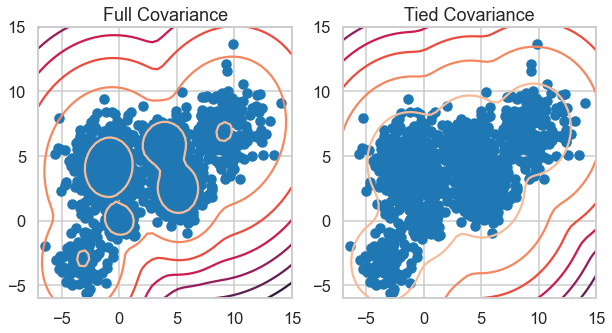

In [ ]:
plt.figure(figsize = (10, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    X, Y = np.meshgrid(np.linspace(-7, 15), np.linspace(-6, 15))
    XX = np.array([X.ravel(), Y.ravel()]).T
    if i == 0:
        plt.title('Full Covariance')
        Z = gmm_full.score_samples(XX)
    else:
        plt.title('Tied Covariance')
        Z = gmm_tied.score_samples(XX)

    Z = Z.reshape((50, 50))

    plt.contour(X, Y, Z)
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1])

plt.show()

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

#### K-Means Clustering

In [ ]:
df = pd.DataFrame(data = iris_data.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['target'] = pd.Series(iris_data.target)
df_s = df.copy()
df_s['target'] = pd.Series(iris_data.target)
species = []

for i in range(len(df)):
    if df.iloc[i]['target'] == 0:
        species.append('setosa')
    elif df.iloc[i]['target'] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')

df['Species'] = species


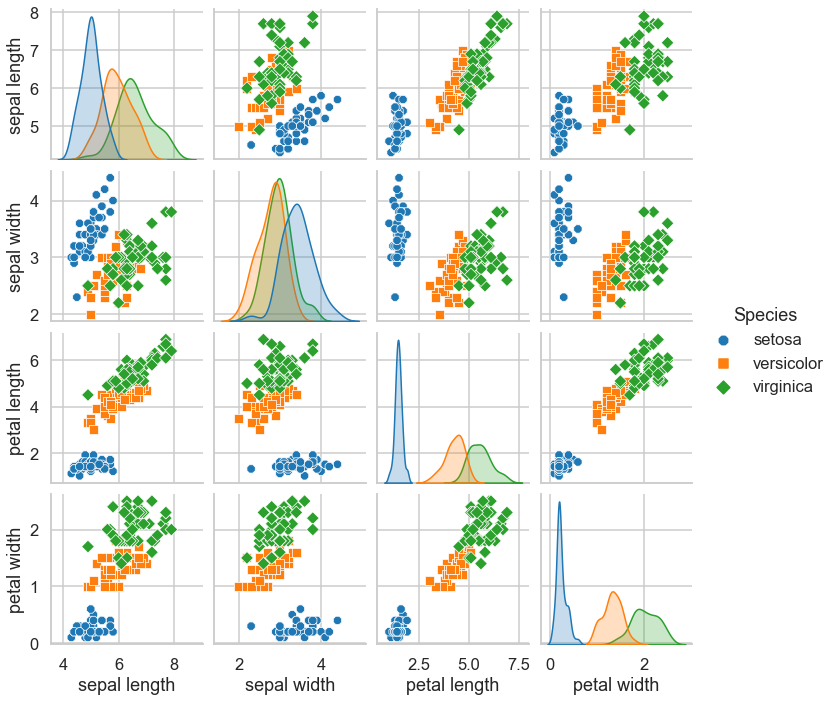

In [ ]:
sns.pairplot(df.drop(['target'], axis=1), hue = 'Species', height=2.5, markers = ['8', 's', 'D'])

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
x = iris_data.data
y = kmeans.fit_predict(x)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


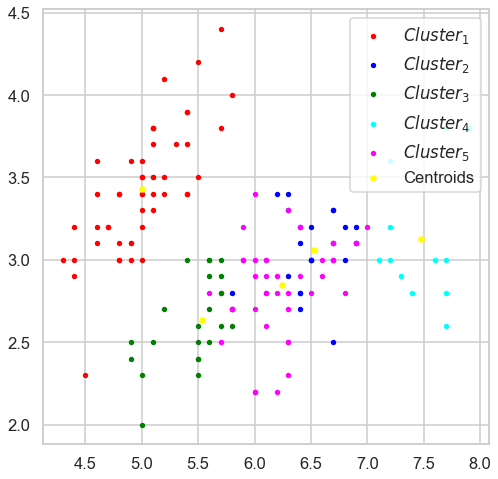

In [ ]:
plt.scatter(x[y == 0,0], x[y == 0,1], s = 15, c = 'red', label = '$Cluster_1$')
plt.scatter(x[y == 1,0], x[y == 1,1], s = 15, c = 'blue', label = '$Cluster_2$')
plt.scatter(x[y == 2,0], x[y == 2,1], s = 15, c = 'green', label = '$Cluster_3$')
plt.scatter(x[y == 3,0], x[y == 3,1], s = 15, c = 'cyan', label = '$Cluster_4$')
plt.scatter(x[y == 4,0], x[y == 4,1], s = 15, c = 'magenta', label = '$Cluster_5$')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =25, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [ ]:
error = []
kmeans_clusters = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x)
    kmeans_clusters.append(kmeans)
    error.append(kmeans.inertia_)

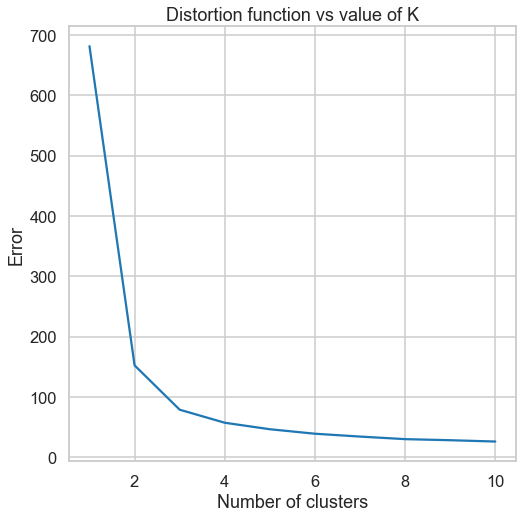

In [ ]:
plt.plot(range(1, 11), error)
plt.title('Distortion function vs value of K')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
silhouette_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(x, model.labels_) for model in kmeans_clusters]

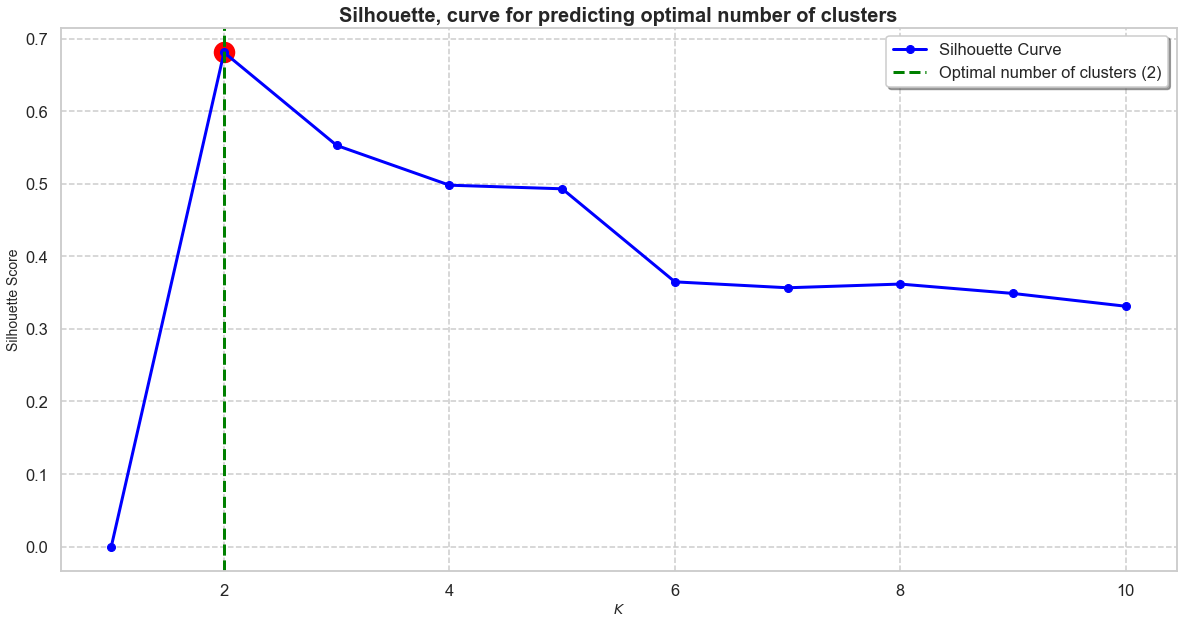

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), silhouette_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('$K$', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal number of clusters', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal number of clusters ({k})')
plt.scatter(k, silhouette_scores[k - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Hierarchal Clustering

In [ ]:
heirarchal_clusters = {}
heirarchal_clusters['euclidean_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average').fit(df_s)
heirarchal_clusters['euclidean_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'single' ).fit(df_s)
heirarchal_clusters['manhattan_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'average').fit(df_s)
heirarchal_clusters['manhattan_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'single' ).fit(df_s)
heirarchal_clusters['cosine_average']    = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'average').fit(df_s)
heirarchal_clusters['cosine_single']     = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'single' ).fit(df_s)


In [ ]:
silhouette_hierarchical_scores = {}
silhouette_hierarchical_scores['euclidean_average'] = silhouette_score(df_s, heirarchal_clusters['euclidean_average'].labels_)
silhouette_hierarchical_scores['euclidean_single']  = silhouette_score(df_s, heirarchal_clusters['euclidean_single'].labels_)
silhouette_hierarchical_scores['manhattan_average'] = silhouette_score(df_s, heirarchal_clusters['manhattan_average'].labels_)
silhouette_hierarchical_scores['manhattan_single']  = silhouette_score(df_s, heirarchal_clusters['manhattan_single'].labels_)
silhouette_hierarchical_scores['cosine_average']    = silhouette_score(df_s, heirarchal_clusters['cosine_average'].labels_)
silhouette_hierarchical_scores['cosine_single']     = silhouette_score(df_s, heirarchal_clusters['cosine_single'].labels_)

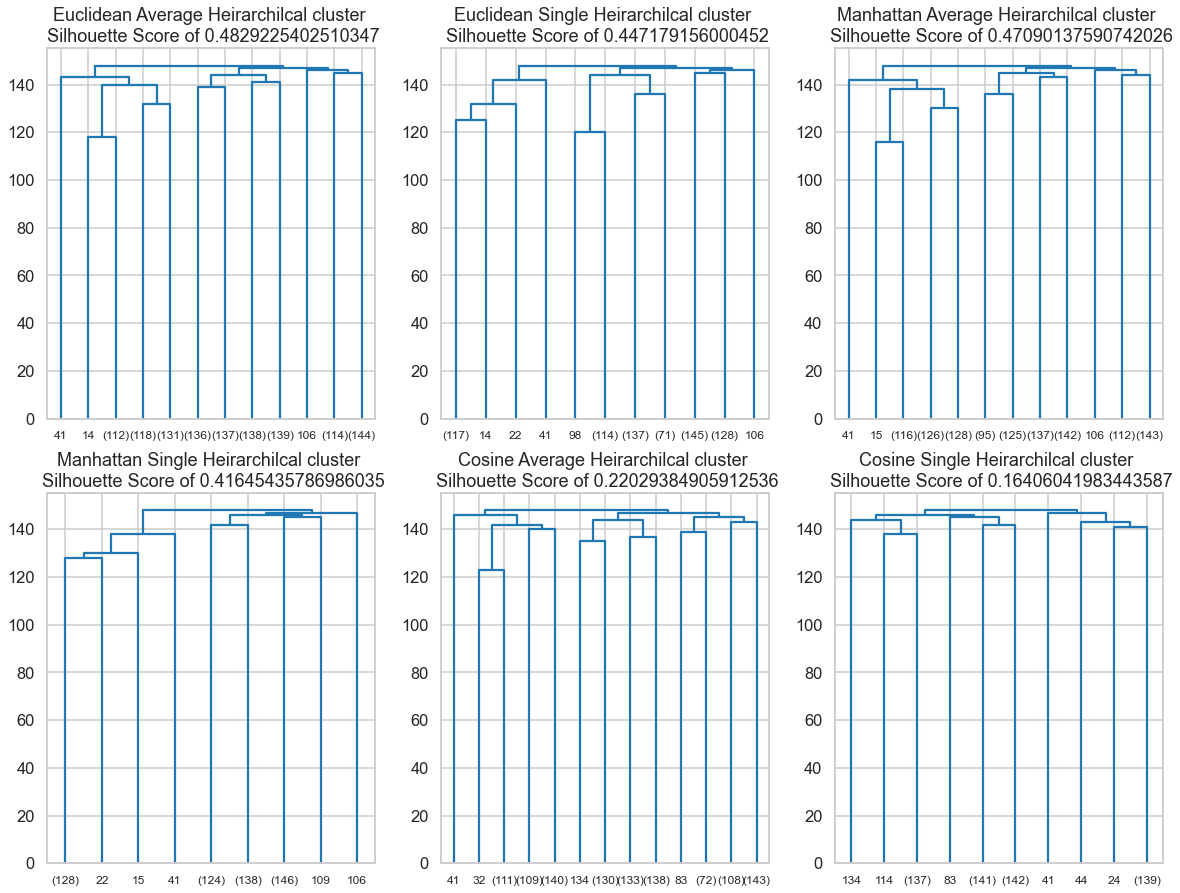

In [ ]:
plt.subplots(nrows = 2, ncols = 3, figsize = (20, 15))

plt.subplot(2, 3, 1)
plt.title(f"Euclidean Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_average']}")
plot_dendrogram(heirarchal_clusters['euclidean_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 2)
plt.title(f"Euclidean Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_single']}")
plot_dendrogram(heirarchal_clusters['euclidean_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 3)
plt.title(f"Manhattan Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_average']}")
plot_dendrogram(heirarchal_clusters['manhattan_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 4)
plt.title(f"Manhattan Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_single']}")
plot_dendrogram(heirarchal_clusters['manhattan_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 5)
plt.title(f"Cosine Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_average']}")
plot_dendrogram(heirarchal_clusters['cosine_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 6)
plt.title(f"Cosine Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_single']}")
plot_dendrogram(heirarchal_clusters['cosine_single'], truncate_mode = 'level', p = 3)

plt.show()

#### DBSCAN Clustering

In [ ]:
dbscans = []
for i in range(1, 21):
    model = DBSCAN(eps = i * 0.15, min_samples = 4 + i).fit(df_s)
    dbscans.append(model)

In [ ]:
silhouette_dbscans_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(df_s, model.labels_) for model in dbscans[0: ]]

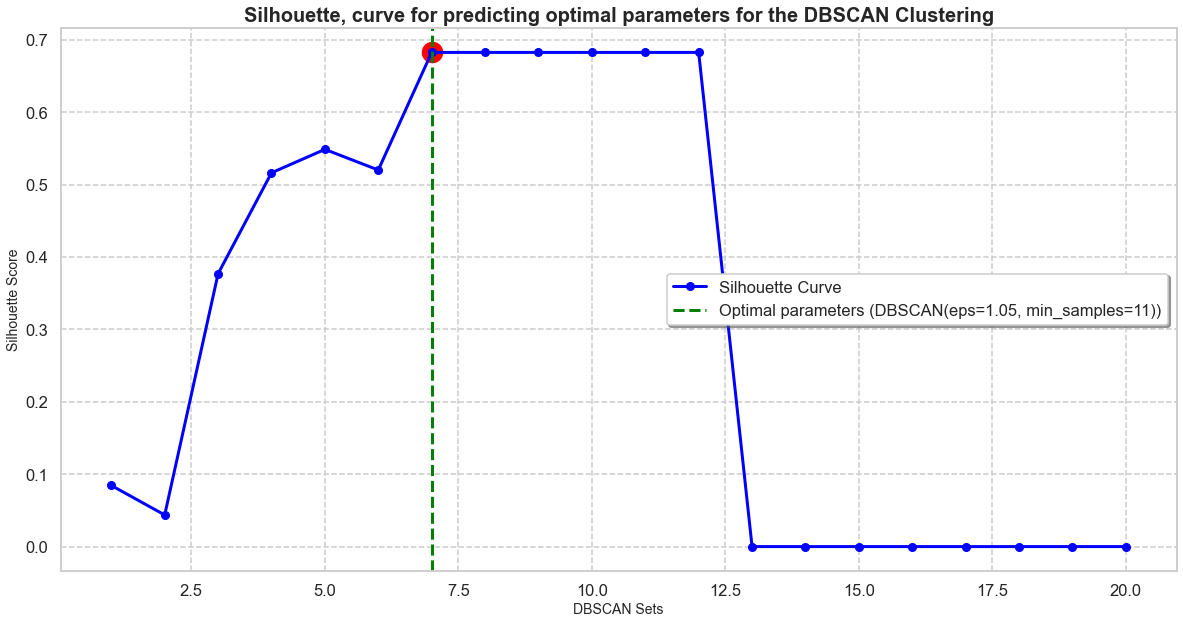

In [ ]:
# Plot the silhouette scores graph
plt.figure(figsize=(20, 10))
plt.plot(range(1, 21), silhouette_dbscans_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('DBSCAN Sets', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal parameters for the DBSCAN Clustering', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
best_dbs = np.argmax(silhouette_dbscans_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = best_dbs, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal parameters ({dbscans[best_dbs - 1]})')
plt.scatter(best_dbs, silhouette_dbscans_scores[best_dbs - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Gaussian Mixture Model

In [ ]:
gmm_full = GaussianMixture(n_components = 6, covariance_type='full').fit(df_s)
gmm_tied = GaussianMixture(n_components = 6, covariance_type='tied').fit(df_s)

gmm_full_clusters = gmm_full.predict(df_s)
gmm_tied_clusters = gmm_tied.predict(df_s)

silhouette_gmm_scores = []
silhouette_gmm_scores.append(silhouette_score(df_s, gmm_full_clusters))
silhouette_gmm_scores.append(silhouette_score(df_s, gmm_tied_clusters))

print(f'Silhouette Score for GMM model with full covariance type: {silhouette_gmm_scores[0]}')
print(f'Silhouette Score for GMM model with tied covariance type: {silhouette_gmm_scores[1]}')

Silhouette Score for GMM model with full covariance type: 0.2376200935987116
Silhouette Score for GMM model with tied covariance type: 0.3394097275843355


### Normalizing the Iris data set

In [ ]:
std_scaler = StandardScaler()
df_s.iloc[:, [0, 1, 2, 3]] = std_scaler.fit_transform(df_s.iloc[:, [0, 1, 2, 3]])


#### K-Means Clustering

In [ ]:
error = []
kmeans_clusters = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(df_s)
    kmeans_clusters.append(kmeans)
    error.append(kmeans.inertia_)

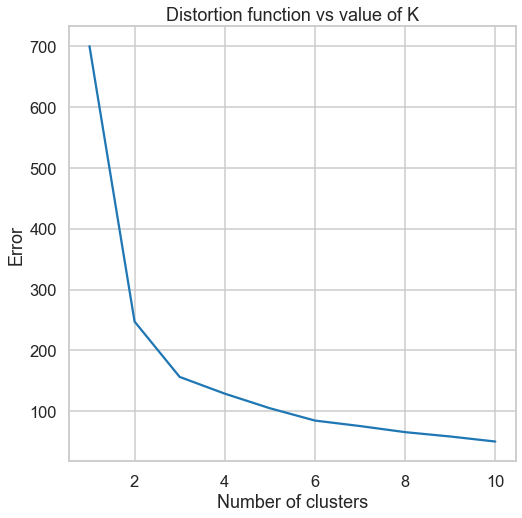

In [ ]:
plt.plot(range(1, 11), error)
plt.title('Distortion function vs value of K')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
silhouette_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(x, model.labels_) for model in kmeans_clusters]

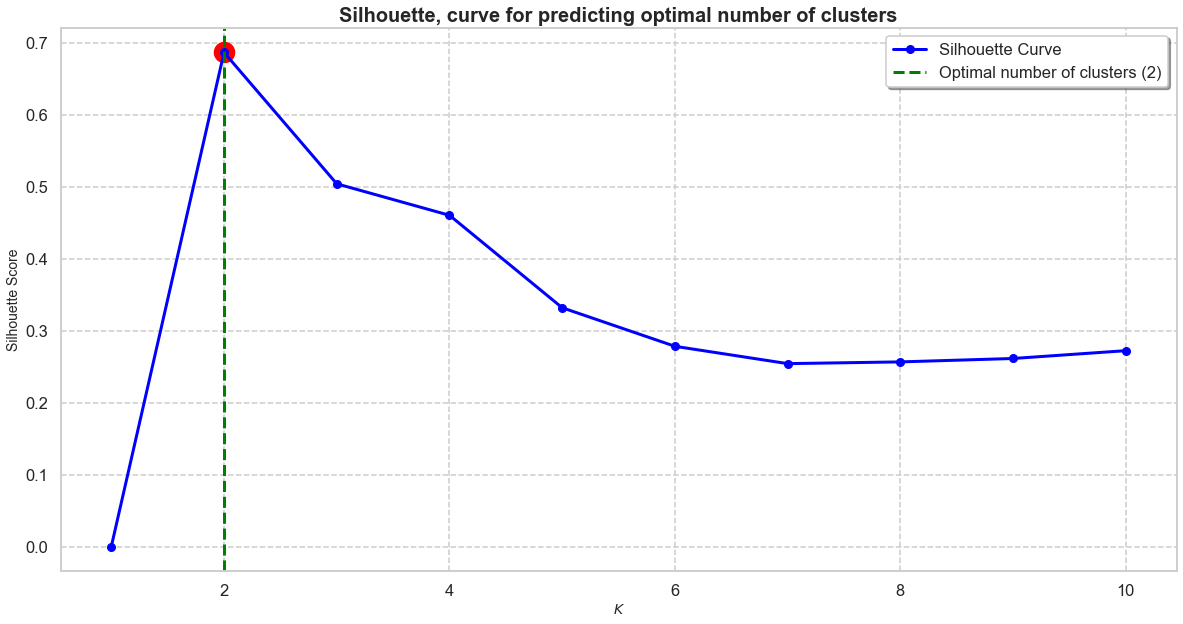

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), silhouette_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('$K$', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal number of clusters', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal number of clusters ({k})')
plt.scatter(k, silhouette_scores[k - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Hierarchal Clustering

In [ ]:
heirarchal_clusters = {}
heirarchal_clusters['euclidean_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average').fit(df_s)
heirarchal_clusters['euclidean_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'single' ).fit(df_s)
heirarchal_clusters['manhattan_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'average').fit(df_s)
heirarchal_clusters['manhattan_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'single' ).fit(df_s)
heirarchal_clusters['cosine_average']    = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'average').fit(df_s)
heirarchal_clusters['cosine_single']     = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'single' ).fit(df_s)


In [ ]:
silhouette_hierarchical_scores = {}
silhouette_hierarchical_scores['euclidean_average'] = silhouette_score(df_s, heirarchal_clusters['euclidean_average'].labels_)
silhouette_hierarchical_scores['euclidean_single']  = silhouette_score(df_s, heirarchal_clusters['euclidean_single'].labels_)
silhouette_hierarchical_scores['manhattan_average'] = silhouette_score(df_s, heirarchal_clusters['manhattan_average'].labels_)
silhouette_hierarchical_scores['manhattan_single']  = silhouette_score(df_s, heirarchal_clusters['manhattan_single'].labels_)
silhouette_hierarchical_scores['cosine_average']    = silhouette_score(df_s, heirarchal_clusters['cosine_average'].labels_)
silhouette_hierarchical_scores['cosine_single']     = silhouette_score(df_s, heirarchal_clusters['cosine_single'].labels_)

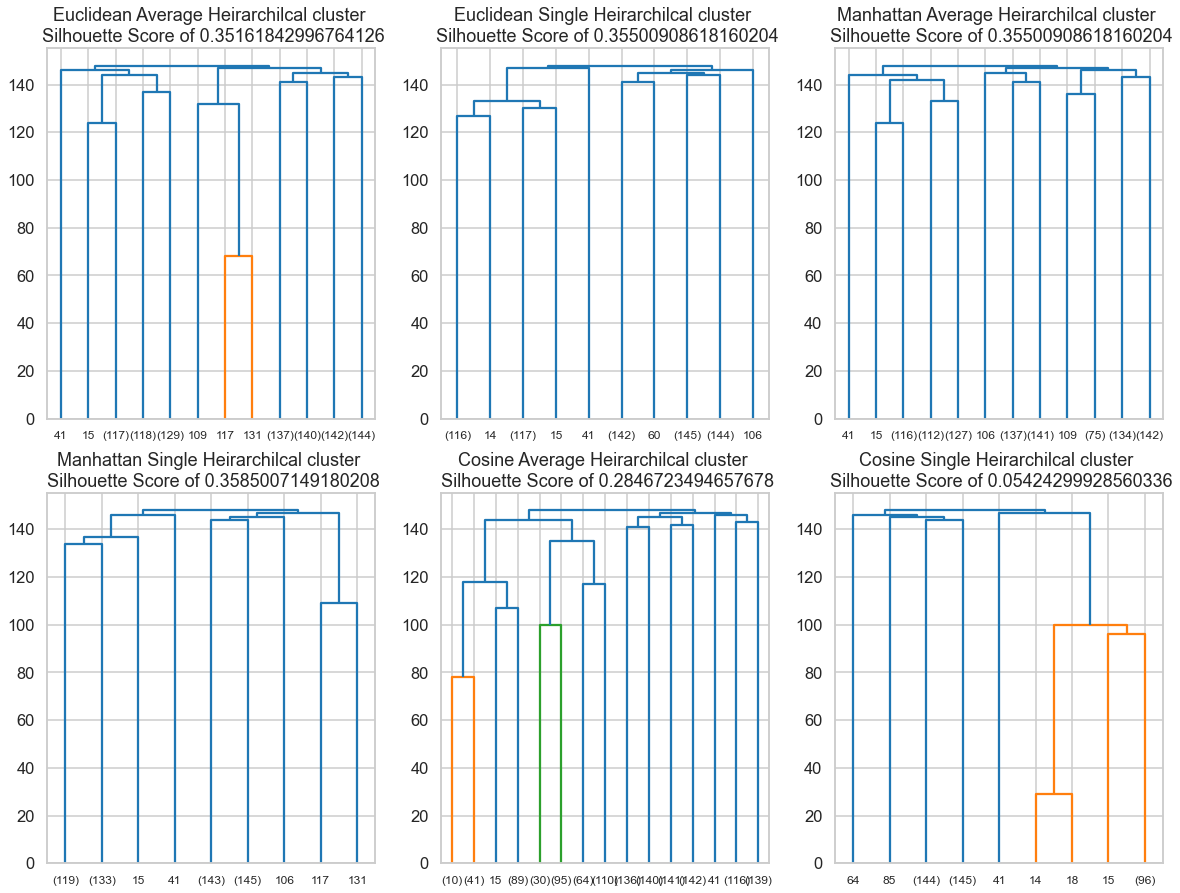

In [ ]:
plt.subplots(nrows = 2, ncols = 3, figsize = (20, 15))

plt.subplot(2, 3, 1)
plt.title(f"Euclidean Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_average']}")
plot_dendrogram(heirarchal_clusters['euclidean_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 2)
plt.title(f"Euclidean Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_single']}")
plot_dendrogram(heirarchal_clusters['euclidean_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 3)
plt.title(f"Manhattan Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_average']}")
plot_dendrogram(heirarchal_clusters['manhattan_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 4)
plt.title(f"Manhattan Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_single']}")
plot_dendrogram(heirarchal_clusters['manhattan_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 5)
plt.title(f"Cosine Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_average']}")
plot_dendrogram(heirarchal_clusters['cosine_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 6)
plt.title(f"Cosine Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_single']}")
plot_dendrogram(heirarchal_clusters['cosine_single'], truncate_mode = 'level', p = 3)

plt.show()

#### DBSCAN Clustering

In [ ]:
dbscans = []
for i in range(1, 21):
    model = DBSCAN(eps = i * 0.15, min_samples = 4 + i).fit(df_s)
    dbscans.append(model)

In [ ]:
silhouette_dbscans_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(df_s, model.labels_) for model in dbscans[0: ]]

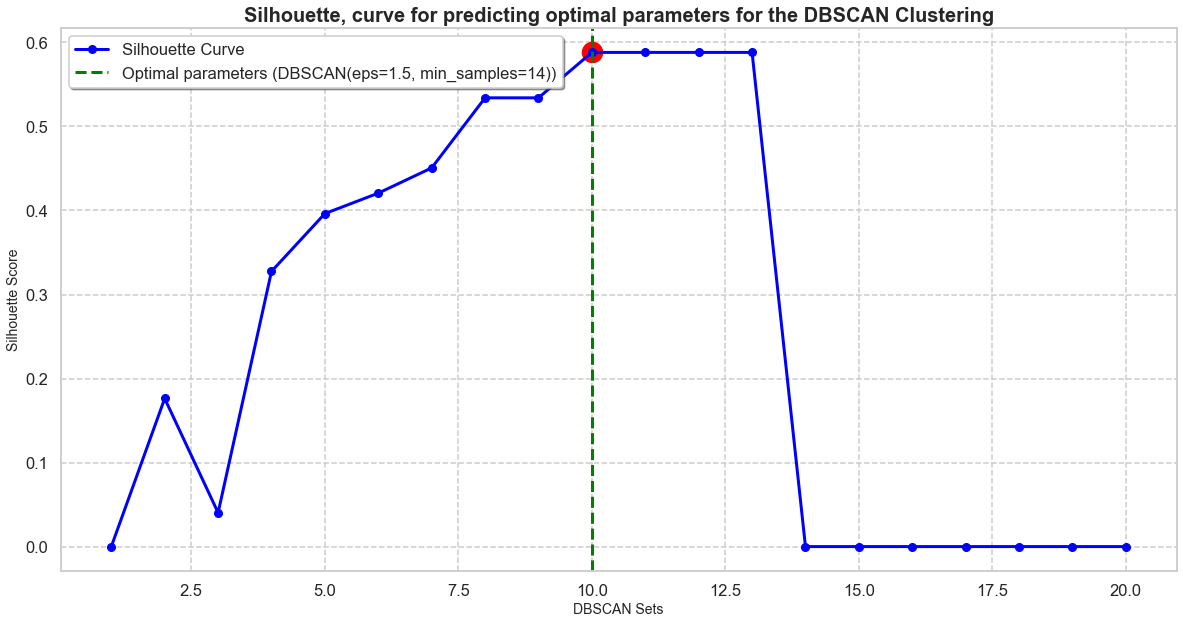

In [ ]:
# Plot the silhouette scores graph
plt.figure(figsize=(20, 10))
plt.plot(range(1, 21), silhouette_dbscans_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('DBSCAN Sets', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal parameters for the DBSCAN Clustering', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
best_dbs = np.argmax(silhouette_dbscans_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = best_dbs, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal parameters ({dbscans[best_dbs - 1]})')
plt.scatter(best_dbs, silhouette_dbscans_scores[best_dbs - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Gaussian Mixture Model

In [ ]:
gmm_full = GaussianMixture(n_components = 6, covariance_type='full').fit(df_s)
gmm_tied = GaussianMixture(n_components = 6, covariance_type='tied').fit(df_s)

gmm_full_clusters = gmm_full.predict(df_s)
gmm_tied_clusters = gmm_tied.predict(df_s)

silhouette_gmm_scores = []
silhouette_gmm_scores.append(silhouette_score(df_s, gmm_full_clusters))
silhouette_gmm_scores.append(silhouette_score(df_s, gmm_tied_clusters))

print(f'Silhouette Score for GMM model with full covariance type: {silhouette_gmm_scores[0]}')
print(f'Silhouette Score for GMM model with tied covariance type: {silhouette_gmm_scores[1]}')

Silhouette Score for GMM model with full covariance type: 0.2021321535157197
Silhouette Score for GMM model with tied covariance type: 0.26925582142657317


## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
df_s = pd.read_csv('Customer data.csv')
df_s = customer_data.iloc[:, 1:]

#### K-Means Clustering

In [ ]:
error = []
kmeans_clusters = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(df_s)
    kmeans_clusters.append(kmeans)
    error.append(kmeans.inertia_)

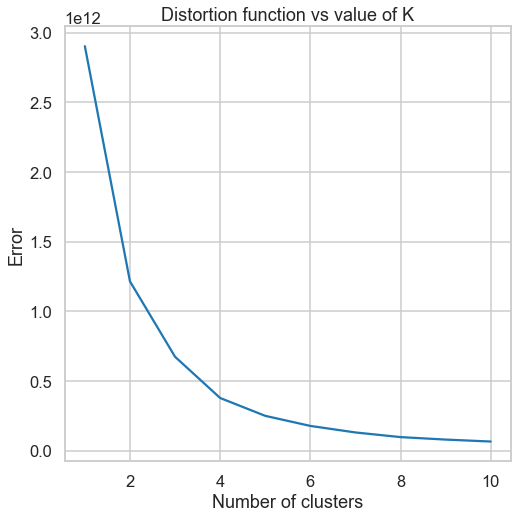

In [ ]:
plt.plot(range(1, 11), error)
plt.title('Distortion function vs value of K')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
silhouette_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(df_s, model.labels_) for model in kmeans_clusters]

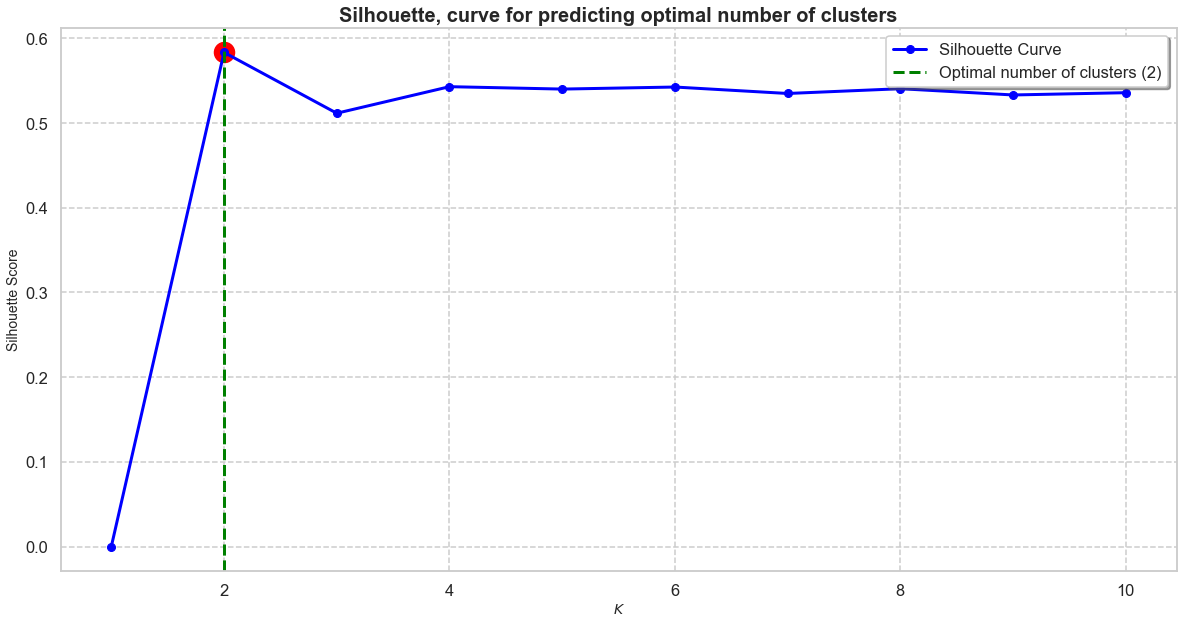

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), silhouette_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('$K$', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal number of clusters', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal number of clusters ({k})')
plt.scatter(k, silhouette_scores[k - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Hierarchal Clustering

In [ ]:
heirarchal_clusters = {}
heirarchal_clusters['euclidean_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average').fit(df_s)
heirarchal_clusters['euclidean_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'single' ).fit(df_s)
heirarchal_clusters['manhattan_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'average').fit(df_s)
heirarchal_clusters['manhattan_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'single' ).fit(df_s)
heirarchal_clusters['cosine_average']    = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'average').fit(df_s)
heirarchal_clusters['cosine_single']     = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'single' ).fit(df_s)


In [ ]:
silhouette_hierarchical_scores = {}
silhouette_hierarchical_scores['euclidean_average'] = silhouette_score(df_s, heirarchal_clusters['euclidean_average'].labels_)
silhouette_hierarchical_scores['euclidean_single']  = silhouette_score(df_s, heirarchal_clusters['euclidean_single'].labels_)
silhouette_hierarchical_scores['manhattan_average'] = silhouette_score(df_s, heirarchal_clusters['manhattan_average'].labels_)
silhouette_hierarchical_scores['manhattan_single']  = silhouette_score(df_s, heirarchal_clusters['manhattan_single'].labels_)
silhouette_hierarchical_scores['cosine_average']    = silhouette_score(df_s, heirarchal_clusters['cosine_average'].labels_)
silhouette_hierarchical_scores['cosine_single']     = silhouette_score(df_s, heirarchal_clusters['cosine_single'].labels_)

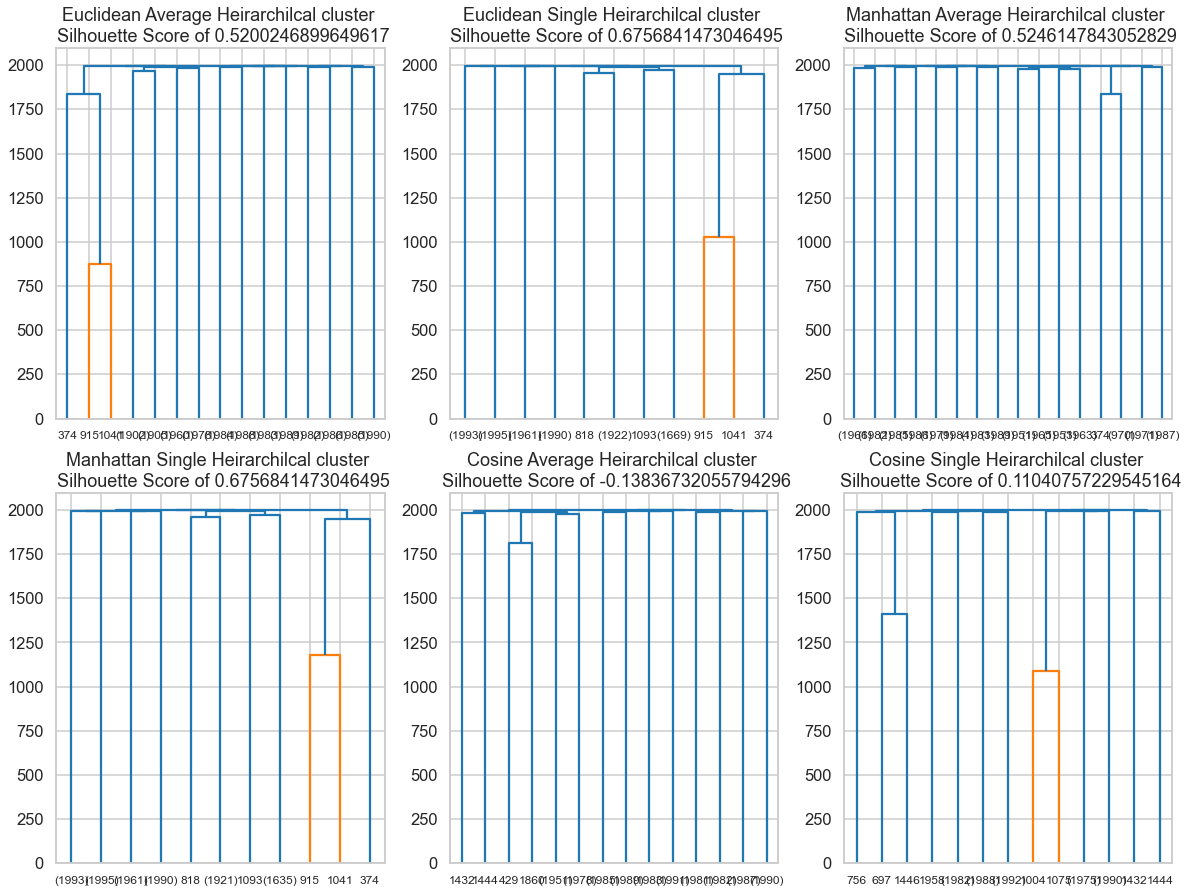

In [ ]:
plt.subplots(nrows = 2, ncols = 3, figsize = (20, 15))

plt.subplot(2, 3, 1)
plt.title(f"Euclidean Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_average']}")
plot_dendrogram(heirarchal_clusters['euclidean_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 2)
plt.title(f"Euclidean Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_single']}")
plot_dendrogram(heirarchal_clusters['euclidean_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 3)
plt.title(f"Manhattan Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_average']}")
plot_dendrogram(heirarchal_clusters['manhattan_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 4)
plt.title(f"Manhattan Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_single']}")
plot_dendrogram(heirarchal_clusters['manhattan_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 5)
plt.title(f"Cosine Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_average']}")
plot_dendrogram(heirarchal_clusters['cosine_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 6)
plt.title(f"Cosine Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_single']}")
plot_dendrogram(heirarchal_clusters['cosine_single'], truncate_mode = 'level', p = 3)

plt.show()

#### DBSCAN Clustering

In [ ]:
dbscans = []
for i in range(1, 21):
    model = DBSCAN(eps = i * 0.15, min_samples = 4 + i).fit(df_s)
    dbscans.append(model)

In [ ]:
silhouette_dbscans_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(df_s, model.labels_) for model in dbscans[0: ]]

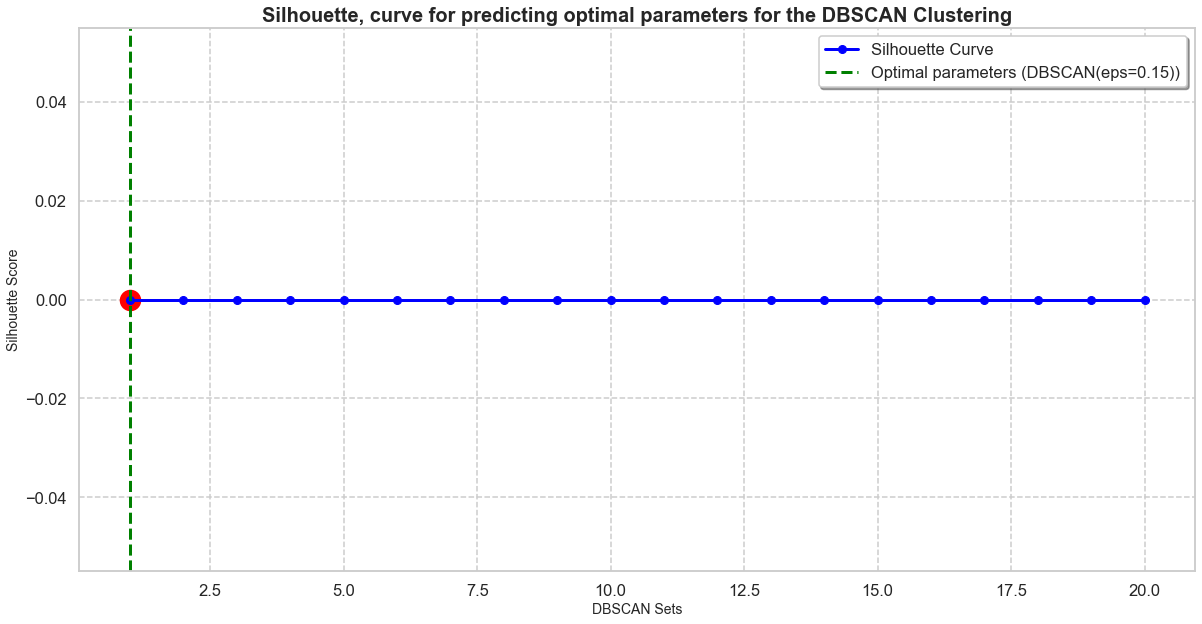

In [ ]:
# Plot the silhouette scores graph
plt.figure(figsize=(20, 10))
plt.plot(range(1, 21), silhouette_dbscans_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('DBSCAN Sets', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal parameters for the DBSCAN Clustering', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
best_dbs = np.argmax(silhouette_dbscans_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = best_dbs, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal parameters ({dbscans[best_dbs - 1]})')
plt.scatter(best_dbs, silhouette_dbscans_scores[best_dbs - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Gaussian Mixture Model

In [ ]:
gmm_full = GaussianMixture(n_components = 6, covariance_type='full').fit(df_s)
gmm_tied = GaussianMixture(n_components = 6, covariance_type='tied').fit(df_s)

gmm_full_clusters = gmm_full.predict(df_s)
gmm_tied_clusters = gmm_tied.predict(df_s)

silhouette_gmm_scores = []
silhouette_gmm_scores.append(silhouette_score(df_s, gmm_full_clusters))
silhouette_gmm_scores.append(silhouette_score(df_s, gmm_tied_clusters))

print(f'Silhouette Score for GMM model with full covariance type: {silhouette_gmm_scores[0]}')
print(f'Silhouette Score for GMM model with tied covariance type: {silhouette_gmm_scores[1]}')

Silhouette Score for GMM model with full covariance type: 0.040804545835992495
Silhouette Score for GMM model with tied covariance type: -0.015399467891247475


### Normalizing the Iris data set

In [ ]:
std_scaler = StandardScaler()
df_s.iloc[:, [0, 1, 2, 3]] = std_scaler.fit_transform(df_s.iloc[:, [0, 1, 2, 3]])

#### K-Means Clustering

In [ ]:
error = []
kmeans_clusters = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(df_s)
    kmeans_clusters.append(kmeans)
    error.append(kmeans.inertia_)

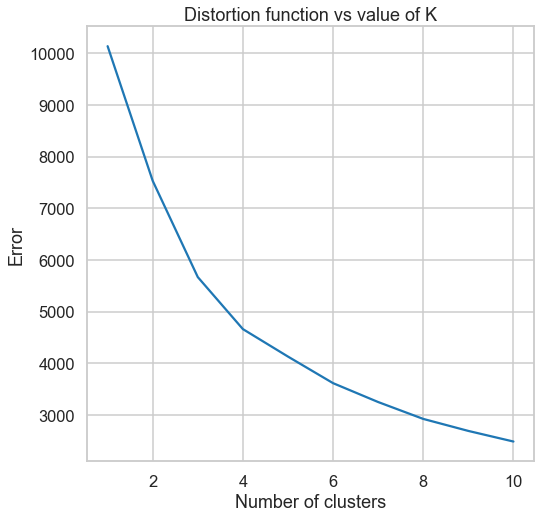

In [ ]:
plt.plot(range(1, 11), error)
plt.title('Distortion function vs value of K')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
silhouette_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(df_s, model.labels_) for model in kmeans_clusters]

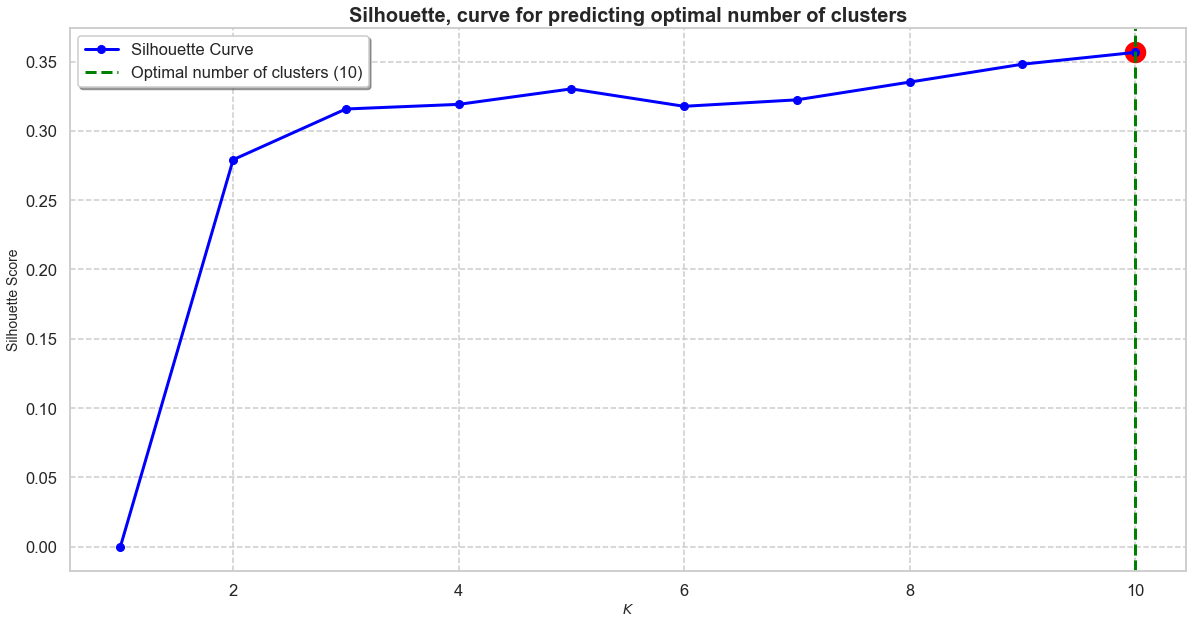

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), silhouette_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('$K$', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal number of clusters', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
k = np.argmax(silhouette_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal number of clusters ({k})')
plt.scatter(k, silhouette_scores[k - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Hierarchal Clustering

In [ ]:
heirarchal_clusters = {}
heirarchal_clusters['euclidean_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average').fit(df_s)
heirarchal_clusters['euclidean_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'single' ).fit(df_s)
heirarchal_clusters['manhattan_average'] = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'average').fit(df_s)
heirarchal_clusters['manhattan_single']  = AgglomerativeClustering(n_clusters = 6, affinity = 'manhattan', linkage = 'single' ).fit(df_s)
heirarchal_clusters['cosine_average']    = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'average').fit(df_s)
heirarchal_clusters['cosine_single']     = AgglomerativeClustering(n_clusters = 6, affinity = 'cosine',    linkage = 'single' ).fit(df_s)


In [ ]:
silhouette_hierarchical_scores = {}
silhouette_hierarchical_scores['euclidean_average'] = silhouette_score(df_s, heirarchal_clusters['euclidean_average'].labels_)
silhouette_hierarchical_scores['euclidean_single']  = silhouette_score(df_s, heirarchal_clusters['euclidean_single'].labels_)
silhouette_hierarchical_scores['manhattan_average'] = silhouette_score(df_s, heirarchal_clusters['manhattan_average'].labels_)
silhouette_hierarchical_scores['manhattan_single']  = silhouette_score(df_s, heirarchal_clusters['manhattan_single'].labels_)
silhouette_hierarchical_scores['cosine_average']    = silhouette_score(df_s, heirarchal_clusters['cosine_average'].labels_)
silhouette_hierarchical_scores['cosine_single']     = silhouette_score(df_s, heirarchal_clusters['cosine_single'].labels_)

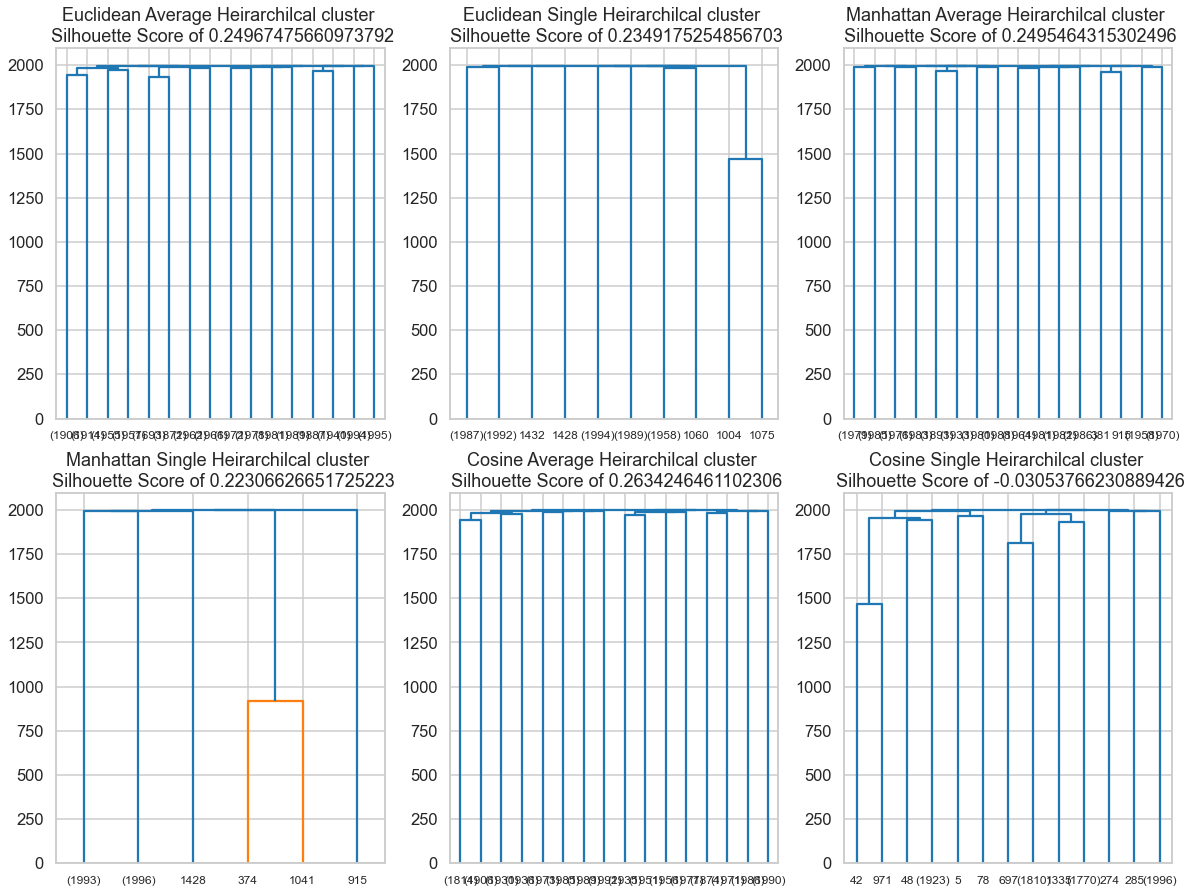

In [ ]:
plt.subplots(nrows = 2, ncols = 3, figsize = (20, 15))

plt.subplot(2, 3, 1)
plt.title(f"Euclidean Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_average']}")
plot_dendrogram(heirarchal_clusters['euclidean_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 2)
plt.title(f"Euclidean Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['euclidean_single']}")
plot_dendrogram(heirarchal_clusters['euclidean_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 3)
plt.title(f"Manhattan Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_average']}")
plot_dendrogram(heirarchal_clusters['manhattan_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 4)
plt.title(f"Manhattan Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['manhattan_single']}")
plot_dendrogram(heirarchal_clusters['manhattan_single'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 5)
plt.title(f"Cosine Average Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_average']}")
plot_dendrogram(heirarchal_clusters['cosine_average'], truncate_mode = 'level', p = 3)

plt.subplot(2, 3, 6)
plt.title(f"Cosine Single Heirarchilcal cluster \n Silhouette Score of {silhouette_hierarchical_scores['cosine_single']}")
plot_dendrogram(heirarchal_clusters['cosine_single'], truncate_mode = 'level', p = 3)

plt.show()

#### DBSCAN Clustering

In [ ]:
dbscans = []
for i in range(1, 21):
    model = DBSCAN(eps = i * 0.15, min_samples = 4 + i).fit(df_s)
    dbscans.append(model)

In [ ]:
silhouette_dbscans_scores = [0 if len(set(model.labels_)) < 2 else silhouette_score(df_s, model.labels_) for model in dbscans[0: ]]

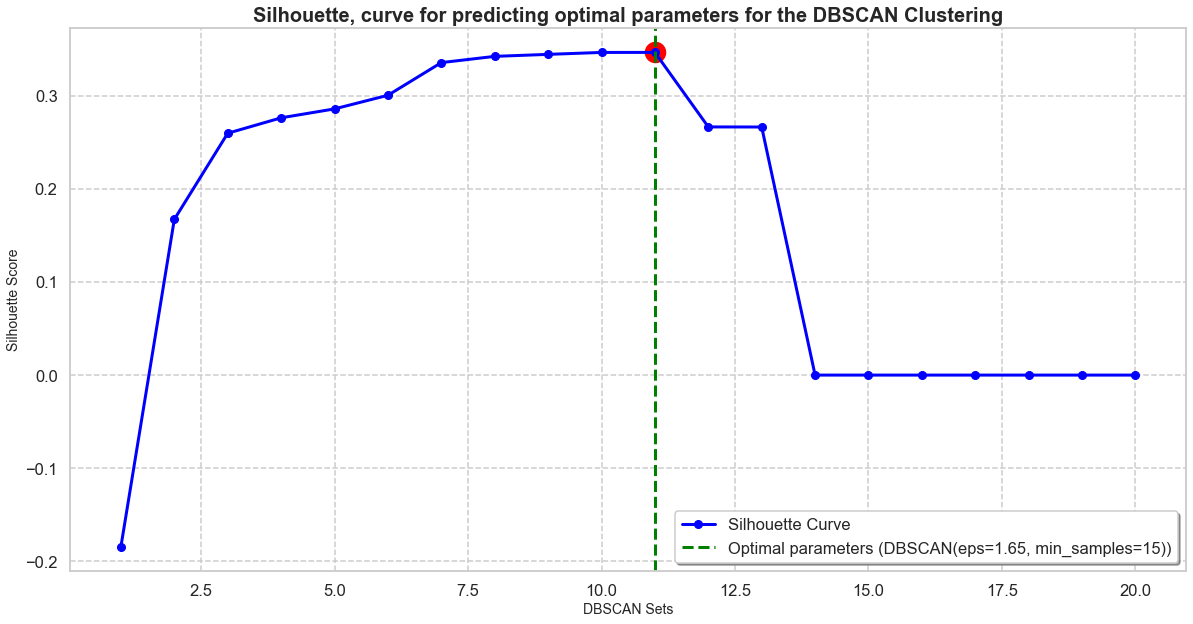

In [ ]:
# Plot the silhouette scores graph
plt.figure(figsize=(20, 10))
plt.plot(range(1, 21), silhouette_dbscans_scores, 'bo-', color = 'blue', linewidth = 3, markersize = 8, label = 'Silhouette Curve')
plt.xlabel('DBSCAN Sets', fontsize = 14, family = 'Arial')
plt.ylabel('Silhouette Score', fontsize = 14, family = 'Arial')
plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plt.title('Silhouette, curve for predicting optimal parameters for the DBSCAN Clustering', family = 'Arial', fontsize = 20, weight = 'bold')

# Calculate the optimal number of clusters
best_dbs = np.argmax(silhouette_dbscans_scores) + 1

# Draw a vertical line to mark the optimal number of clusters
plt.axvline(x = best_dbs, linestyle = '--', c = 'green', linewidth = 3, label = f'Optimal parameters ({dbscans[best_dbs - 1]})')
plt.scatter(best_dbs, silhouette_dbscans_scores[best_dbs - 1], c = 'red', s = 400)

plt.legend(shadow = True)
plt.show()

#### Gaussian Mixture Model

In [ ]:
gmm_full = GaussianMixture(n_components = 6, covariance_type='full').fit(df_s)
gmm_tied = GaussianMixture(n_components = 6, covariance_type='tied').fit(df_s)

gmm_full_clusters = gmm_full.predict(df_s)
gmm_tied_clusters = gmm_tied.predict(df_s)

silhouette_gmm_scores = []
silhouette_gmm_scores.append(silhouette_score(df_s, gmm_full_clusters))
silhouette_gmm_scores.append(silhouette_score(df_s, gmm_tied_clusters))

print(f'Silhouette Score for GMM model with full covariance type: {silhouette_gmm_scores[0]}')
print(f'Silhouette Score for GMM model with tied covariance type: {silhouette_gmm_scores[1]}')

Silhouette Score for GMM model with full covariance type: 0.26479022709250544
Silhouette Score for GMM model with tied covariance type: 0.27135693877410827
